In [22]:
import pandas as pd
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [23]:
#loading the digits and then finding the KMean clusters
from sklearn.datasets import load_digits
digit = load_digits()
x = digit.data
y = digit.target
x.shape

(1797, 64)

In [24]:
#result is 10 clusters into 64 dimensions
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=10,max_iter=300,random_state=7)
clusters = KMeans.fit_predict(x)
KMeans.cluster_centers_.shape

(10, 64)

In [25]:
KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

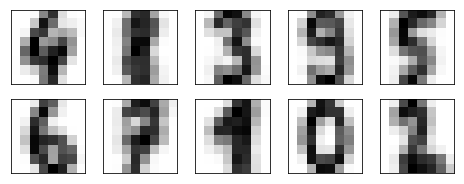

In [26]:
#We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the
#exception of 1 and 8.
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = KMeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [27]:
# check how accurate our unsupervised clustering was in finding similar digits within the data
import numpy as np
labels= np.zeros_like(clusters)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from scipy import stats
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    a = (clusters == i)
    labels[a] = mode(y[a])[0]

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y, labels)

0.7935447968836951

In [30]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y,labels)
print(matrix)

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   5   0   0 164   0   0   9   3   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   5   3   2   0   4   2   5 102  51]
 [  0  20   0   6   0   6   0   7   2 139]]


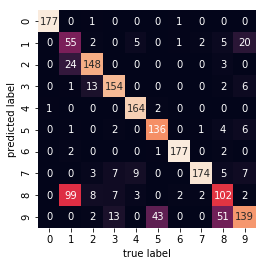

In [37]:
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digit.target_names,
            yticklabels=digit.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
import seaborn as sns
sns.set
#matplotlib inline

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)>

# Image

C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


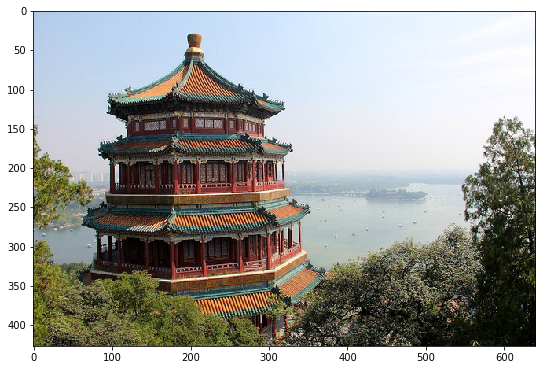

In [33]:
#The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions 
#as integers from 0 to 255:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
%matplotlib inline
china = load_sample_image("china.jpg") 
plt.figure(figsize = (9,7))
plt.imshow(china)


In [34]:
china.shape

(427, 640, 3)

In [36]:
#for clustering the image, we need to convert it into a two-dimensional array with the length being the 427*640 and width (3) as
#the RGB value.
x, y, z = china.shape
china_2d = china.reshape(x*y, z)
china_2d.shape
#plt.imshow(china_2d)

(273280, 3)

In [579]:
# use scikit-learn's cluster method to create clusters. We pass n_clusters as 7 to form seven clusters. 
kmeans_cluster = cluster.KMeans(n_clusters=7)
kmeans_cluster.fit(china_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers2= np.array([x / 255.0 for x in cluster_centers])
cluster_centers2

array([[0.09053892, 0.07934594, 0.05351276],
       [0.91644445, 0.94291771, 0.97715866],
       [0.58555184, 0.52448605, 0.42126259],
       [0.77486243, 0.83461483, 0.89823359],
       [0.41278743, 0.37766369, 0.26011026],
       [0.69126694, 0.70013707, 0.67074319],
       [0.25076182, 0.22138832, 0.15919754]])

In [580]:
cluster_labels = kmeans_cluster.labels_
#cluster_labels2= [x * 255 for x in cluster_labels]
cluster_labels

array([3, 3, 3, ..., 6, 0, 0])

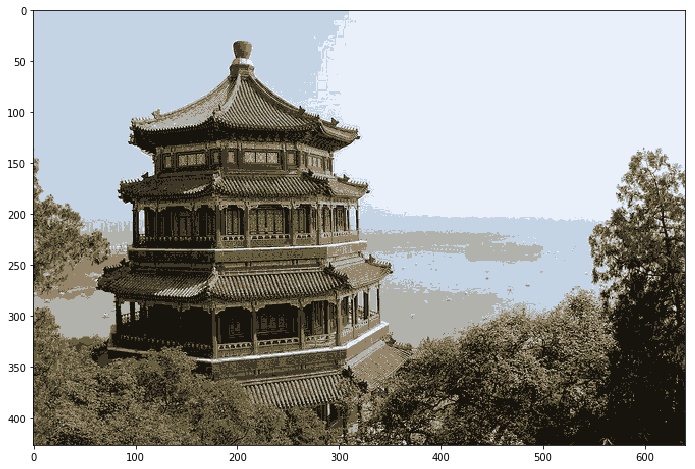

In [581]:
#Once the clusters are formed, we can recreate the image with the cluster centers and labels to display the image with grouped 
#patterns.
#plt.figure(figsize = (15,8))
plt.imshow(cluster_centers2[cluster_labels].reshape(x, y, z))